In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import statsmodels.api as sm
sns.set_theme(style="whitegrid")

# Get data

In [15]:
X, y = datasets.load_iris(return_X_y=True, as_frame=True)
# Concatenate X,y to df
df = pd.concat([X, y], axis=1)
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (150, 4)
Shape of y: (150,)


In [16]:
# Preview train data
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# Show number of classes
y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

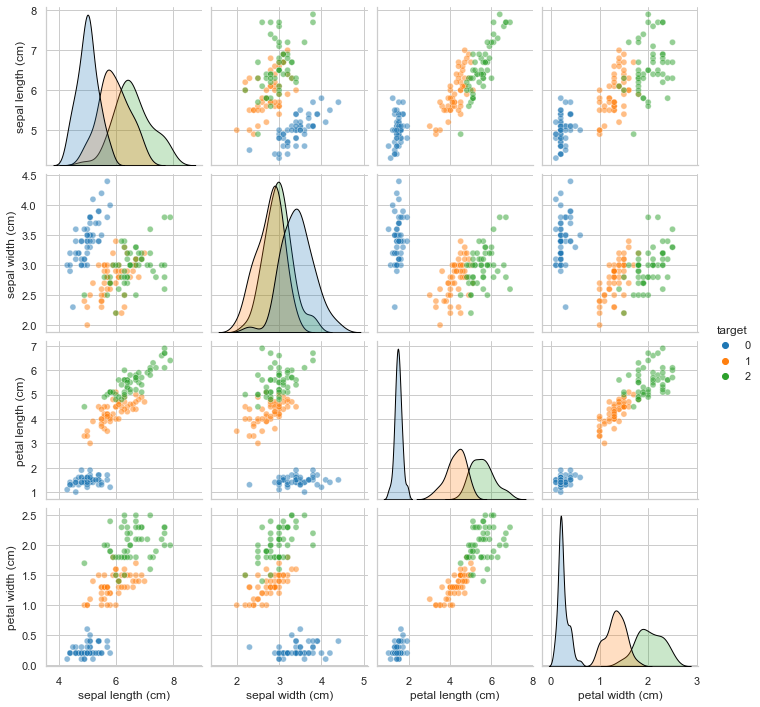

In [19]:
# Pairplot of df, colored by target value
g2 = sns.pairplot(df,
                  hue="target",
                  palette="tab10",
                  plot_kws=dict(alpha=0.5),
                  diag_kws=dict(edgecolor="black"))
plt.show()

# Perform multinomial Logit Regression (In Sample)

In [29]:
%%capture
clf = sm.MNLogit(endog=y, exog=X)
results = clf.fit()

In [24]:
results.params

,0,1
sepal length (cm),-6.972642,-13.300361
sepal width (cm),-6.992383,-13.610570
petal length (cm),17.530770,25.964571
petal width (cm),18.770580,29.053124


In [35]:
print(results.summary2())

                              Results: MNLogit
Model:                  MNLogit              Pseudo R-squared:     0.934     
Dependent Variable:     target               AIC:                  37.6799   
Date:                   2022-07-21 14:21     BIC:                  61.7650   
No. Observations:       150                  Log-Likelihood:       -10.840   
Df Model:               6                    LL-Null:              -164.79   
Df Residuals:           142                  LLR p-value:          1.6555e-63
Converged:              0.0000               Scale:                1.0000    
No. Iterations:         35.0000                                              
-----------------------------------------------------------------------------
    target = 0      Coef.   Std.Err.     t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------
sepal length (cm)  -6.9726 14325.6451 -0.0005 0.9996  -28084.7211  28070.7758
 sepal width (cm)